<a href="https://colab.research.google.com/github/Joheon/Image-processing/blob/main/face%20detection%2C%20color%20extraction%20and%20text%20extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml

import pytesseract
import numpy as np
import cv2 as cv
import os

from skimage import io
from google.colab.patches import cv2_imshow
from PIL import Image

Face detection, Color and Text extraction

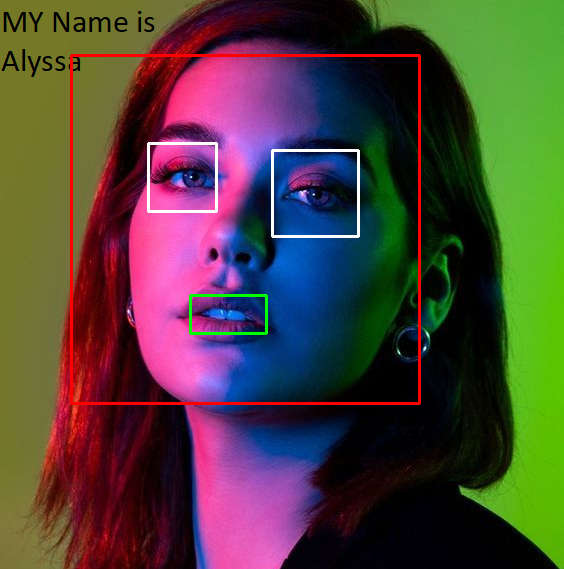

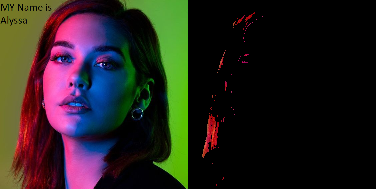

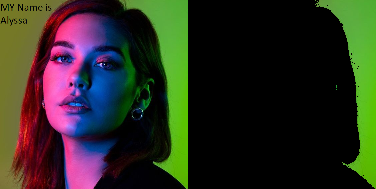

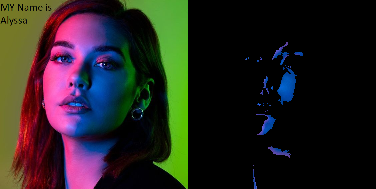

   

MY Name is
Alyssa



In [ ]:
url = "https://drive.google.com/uc?id=1OWbgW_OahhpexAPEojm9LMEYptDci4lS"
test_image = io.imread(url)
grey = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 30)
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in faces:
  cv.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
cv2_imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

url = "https://drive.google.com/uc?id=1OWbgW_OahhpexAPEojm9LMEYptDci4lS"
image = io.imread(url)
h,w,c = image.shape
test_image = cv.resize(image, (int(w / 3), int(h / 3)), interpolation = cv.INTER_CUBIC)
test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)
boundaries=[
   ([0, 0, 150], [100, 100, 255]),         
   ([0, 150, 0], [100, 255, 100]),
   ([150, 0, 0], [255, 100, 100])
           ]
for (lower, upper) in boundaries:
  lower = np.array(lower, dtype = "uint8")
  upper = np.array(upper, dtype = "uint8")
  mask = cv.inRange(test_image, lower, upper)
  #cv2_imshow(mask)
  output = cv.bitwise_and(test_image, test_image, mask = mask)
  #cv2_imshow(output)
  final_frame3 = cv.hconcat((test_image, output))
  cv2_imshow(final_frame3)

url = "https://drive.google.com/uc?id=1OWbgW_OahhpexAPEojm9LMEYptDci4lS"
image = io.imread(url)

grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#cv2_imshow(grey)

filename = "().png".format(os.getpid())
cv.imwrite(filename, grey)

text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)